In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# import tensorflow as tf
# tf.test.gpu_device_name()

In [3]:
# !pip install -q keras

In [4]:
import tensorflow as tf

In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
IMAGE_SIZE = 220

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D

class ConvNet:
    def __init__(self, numFilters, filterSize, filterConf = 'same'):
        return

    def initModel(self, numFilters, filterSize, filterConf = 'same'):
        model = Sequential()
        input_shape1 = (IMAGE_SIZE, IMAGE_SIZE, 3)
        model.add(Conv2D(numFilters, (filterSize, filterSize), input_shape=input_shape1))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))        
        
        for l in range(4):
            model.add(Conv2D(numFilters, (filterSize, filterSize)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
        
        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        
        return model

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import cv2
import csv

DATSET_SIZE = 10000

labels = ["Amphibia","Animalia","Arachnida","Aves","Fungi","Insecta","Mammalia","Mollusca","Plantae","Reptilia"]
# Dataset_Path = '/content/drive/MyDrive/inaturalist_12K'
Dataset_Path = os.getcwd() + '/inaturalist_12K'
train_path = os.path.join(Dataset_Path , 'train')
test_path = os.path.join(Dataset_Path , 'val')
def loadImages():
    trainfiles = []
    trainclasses = []
    classcounts = [0 for i in range(10)]
    testfiles = []
    testclasses = []
    for subdir , dirs , files in os.walk(train_path):
        for file in files:
            if file.endswith(".jpg"):
                trainfiles.append(os.path.join(subdir,file))
                c = str(subdir).split(os.sep)[-1]
                for i in range(10):
                    if labels[i] == c:
                        trainclasses.append(i)
                        classcounts[i]+=1
                        break
    for subdir , dirs , files in os.walk(train_path):
        for file in files:
            if file.endswith(".jpg"):
                testfiles.append(os.path.join(subdir,file))
                c = str(subdir).split(os.sep)[-1]
                for i in range(10):
                    if labels[i] == c:
                        testclasses.append(i)
    return trainfiles , trainclasses , testfiles , testclasses , classcounts
def preprocess(data, height, width):
    dim = (width, height)
    resdata = []
    for i in range(len(data[:DATSET_SIZE])):
        try:
            img = cv2.imread(data[i],cv2.IMREAD_UNCHANGED)
            res = cv2.resize(img, dim , interpolation=cv2.INTER_LINEAR)
            #if image is greyscale, convert it to rgb
            if(len(res.shape) != 3):
                res = cv2.cvtColor(res,cv2.COLOR_GRAY2RGB)
            res = res/255.0
            resdata.append(np.asarray(res))
        except Exception as e:
            print(data[i])
            print(str(e))
    return resdata

def dataset(width,height):
    trainfiles , trainclasses , testfiles , testclasses, classcounts = loadImages()
    train_data = preprocess(trainfiles, height,width)
    test_data = preprocess(testfiles, height,width)
    # train_input = []
    # val_input = []
    # train_output = []
    # val_output = []
    # test_output = []
    # test_input = []
    train_output = np.eye(10)[trainclasses]
    test_output = np.eye(10)[testclasses]
    
    L = len(train_data)
    return {
        'Xtrain' : np.array(train_data), 
        'Ytrain' : np.array(train_output),
        # 'Xval' : np.array(val_input),
        # 'Yval' : np.array(val_output),
        'Xtest' :np.array(test_data),
        'Ytest' :np.array(test_output)
    }
def flat(X):
    X_f = []
    for x in X:
        X_f.append(x.flatten())
    return X_f
def savedata(d): 
    with open('train_data.txt','w') as f:
        csvwriter = csv.writer(f)
        csvwriter.writerows(flat(d['Xtrain']))
# d = dataset(256,256)
# print(d['Xtrain'])
    


In [9]:
# dataset(256,256)

In [10]:
network = ConvNet(32, 3)
model = network.initModel(32, 3)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 218, 218, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 107, 107, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 32)        9

In [11]:
ds = dataset(IMAGE_SIZE, IMAGE_SIZE)
train_images = ds['Xtrain']
train_labels = ds['Ytrain']

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


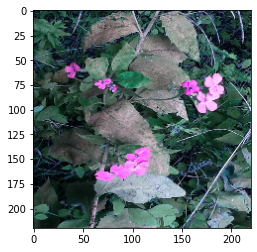

In [12]:
plt.imshow(train_images[8030])
print(train_labels[8030])


In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels[:10000],
          batch_size=64,
          epochs=20,
          validation_split=0.1,
          verbose=1)

Epoch 1/20
141/141 [==============================] - 36s 253ms/step - loss: 2.2830 - accuracy: 0.1202 - val_loss: 3.9163 - val_accuracy: 0.0000e+00
Epoch 2/20
141/141 [==============================] - 5s 36ms/step - loss: 2.2074 - accuracy: 0.1137 - val_loss: 5.9947 - val_accuracy: 0.0000e+00
Epoch 3/20
141/141 [==============================] - 5s 37ms/step - loss: 2.1937 - accuracy: 0.1338 - val_loss: 6.6971 - val_accuracy: 0.0000e+00
Epoch 4/20
141/141 [==============================] - 5s 37ms/step - loss: 2.1797 - accuracy: 0.1518 - val_loss: 7.1173 - val_accuracy: 0.0000e+00
Epoch 5/20
141/141 [==============================] - 5s 37ms/step - loss: 2.1606 - accuracy: 0.1591 - val_loss: 7.1652 - val_accuracy: 0.0000e+00
Epoch 6/20
141/141 [==============================] - 6s 40ms/step - loss: 2.1360 - accuracy: 0.1803 - val_loss: 7.4767 - val_accuracy: 0.0000e+00
Epoch 7/20
141/141 [==============================] - 5s 39ms/step - loss: 2.1271 - accuracy: 0.1867 - val_loss: 7.5

In [ ]:
print(len(train_images))

In [ ]:
# print(len(train_images))
# model.summary()
print(train_images)

## Wandb sweep